## Nov 7.

- ```SW```: Seasonal Weather: temp. and precip.

On Nov. 6 Mike wanted to model cattle inventory using only ```NPP```/```SW``` and rangeland area for one year.

**Min's data are inconsistent:** Let us subset the counties that are in common between ```NPP``` and ```SW```, and cattle inventory.

#### Seasons in Tonsor are
- S1: Jan - Mar
- S2: Apr - Jul
- S3: Aug - Sep
- S4: Oct - Dec

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os, os.path, pickle, sys

import matplotlib
import matplotlib.pyplot as plt

sys.path.append("/Users/hn/Documents/00_GitHub/Rangeland/Python_Codes/")
import rangeland_core as rc

In [2]:
data_dir_base = "/Users/hn/Documents/01_research_data/RangeLand/Data/"
census_population_dir = data_dir_base + "census/"
# Shannon_data_dir = data_dir_base + "Shannon_Data/"
# USDA_data_dir = data_dir_base + "/NASS_downloads/"
param_dir = data_dir_base + "parameters/"
Min_data_base = data_dir_base + "Min_Data/"
reOrganized_dir = data_dir_base + "reOrganized/"
seasonal_dir = reOrganized_dir + "seasonal_variables/02_merged_mean_over_county/"

In [3]:
Bhupi = pd.read_csv(param_dir + "Bhupi_25states_clean.csv")
Bhupi["SC"] = Bhupi.state + "-" + Bhupi.county

print(f"{len(Bhupi.state.unique()) = }")
print(f"{len(Bhupi.county_fips.unique()) = }")
Bhupi.head(2)

len(Bhupi.state.unique()) = 25
len(Bhupi.county_fips.unique()) = 2123


,grid,state,county,county_fips,AFFGEOID,SC
0,data_25.15625_-80.65625,Florida,Miami-Dade,12086,0500000US12086,Florida-Miami-Dade
1,data_25.15625_-80.71875,Florida,Miami-Dade,12086,0500000US12086,Florida-Miami-Dade


In [4]:
SoI = [
    "Alabama",
    "Arkansas",
    "California",
    "Colorado",
    "Florida",
    "Georgia",
    "Idaho",
    "Illinois",
    "Iowa",
    "Kansas",
    "Kentucky",
    "Louisiana",
    "Mississippi",
    "Missouri",
    "Montana",
    "Nebraska",
    "New Mexico",
    "North Dakota",
    "Oklahoma",
    "Oregon",
    "South Dakota",
    "Tennessee",
    "Texas",
    "Virginia",
    "Wyoming",
]

abb_dict = pd.read_pickle(param_dir + "state_abbreviations.sav")

SoI_abb = []
for x in SoI:
    SoI_abb = SoI_abb + [abb_dict["full_2_abb"][x]]

In [5]:
USDA_data = pd.read_pickle(reOrganized_dir + "USDA_data.sav")

cattle_inventory = USDA_data["cattle_inventory"]

# pick only 25 states we want
cattle_inventory = cattle_inventory[cattle_inventory.state.isin(SoI)].copy()

print(f"{cattle_inventory.data_item.unique() = }")
print(f"{cattle_inventory.commodity.unique() = }")
print(f"{cattle_inventory.year.unique() = }")

census_years = list(cattle_inventory.year.unique())
# pick only useful columns
cattle_inventory = cattle_inventory[
    ["year", "county_fips", "cattle_cow_beef_inventory"]
]

print(f"{len(cattle_inventory.county_fips.unique()) = }")
cattle_inventory.head(2)

cattle_inventory.data_item.unique() = array(['CATTLE, COWS, BEEF - INVENTORY'], dtype=object)
cattle_inventory.commodity.unique() = array(['CATTLE'], dtype=object)
cattle_inventory.year.unique() = array([2017, 2012, 2007, 2002, 1997])
len(cattle_inventory.county_fips.unique()) = 2052


,year,county_fips,cattle_cow_beef_inventory
0,2017,01001,8678.0
1,2017,01047,14589.0


In [6]:
print(cattle_inventory.shape)
cattle_inventory = rc.clean_census(
    df=cattle_inventory, col_="cattle_cow_beef_inventory"
)
print(cattle_inventory.shape)

# it was 10,382.

(7900, 3)
(7900, 3)


### Min has an extra "1" as leading digit in FIPS!!

In [7]:
# county_annual_GPP_NPP_prod = pd.read_csv(reOrganized_dir + "county_annual_GPP_NPP_productivity.csv")
# county_annual_GPP_NPP_prod.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

# county_annual_GPP_NPP_prod = county_annual_GPP_NPP_prod[["year", "county", "modis_npp"]].copy()
# county_annual_GPP_NPP_prod.dropna(how='any', inplace=True)
# county_annual_GPP_NPP_prod.sort_values(by=["year", "county"], inplace=True)
# county_annual_GPP_NPP_prod.reset_index(drop=True, inplace=True)
# county_annual_GPP_NPP_prod.head(2)

# NPP = pd.read_csv(reOrganized_dir + "county_annual_GPP_NPP_productivity.csv")
NPP = pd.read_csv(Min_data_base + "county_annual_MODIS_NPP.csv")
NPP.rename(columns={"NPP": "modis_npp"}, inplace=True)

NPP = rc.correct_Mins_FIPS(df=NPP, col_="county")
NPP.rename(columns={"county": "county_fips"}, inplace=True)

NPP.head(2)

,year,county_fips,modis_npp
0,2001,01003,0.926441
1,2001,01005,0.629133


In [8]:
filename = reOrganized_dir + "county_seasonal_temp_ppt_weighted.sav"
seasonal_weather = pd.read_pickle(filename)
print(f"{seasonal_weather.keys() = }")
seasonal_weather = seasonal_weather["seasonal"]
seasonal_weather.head(2)

seasonal_weather.keys() = dict_keys(['seasonal', 'source_code', 'Author', 'Min_file_used', 'Date'])


,county_fips,year,S1_countyMean_total_precip,S2_countyMean_total_precip,S3_countyMean_total_precip,S4_countyMean_total_precip,S1_countyMean_avg_Tavg,S2_countyMean_avg_Tavg,S3_countyMean_avg_Tavg,S4_countyMean_avg_Tavg
0,01003,1979,656.015,678.306,388.477,252.774,11.042778,24.376025,26.330803,15.175087
1,01005,1979,494.41,470.324,277.067,203.357,9.200633,22.690754,24.926689,13.078413


In [9]:
seasonal_var_cols = seasonal_weather.columns[2:10]
for a_col in seasonal_var_cols:
    seasonal_weather[a_col] = seasonal_weather[a_col].astype(float)

In [10]:
# pick only census years
NPP = NPP[NPP.year.isin(census_years)]
NPP.reset_index(drop=True, inplace=True)
NPP.head(2)

# pick only census years
seasonal_weather = seasonal_weather[seasonal_weather.year.isin(census_years)]
seasonal_weather.reset_index(drop=True, inplace=True)
seasonal_weather.head(2)

,county_fips,year,S1_countyMean_total_precip,S2_countyMean_total_precip,S3_countyMean_total_precip,S4_countyMean_total_precip,S1_countyMean_avg_Tavg,S2_countyMean_avg_Tavg,S3_countyMean_avg_Tavg,S4_countyMean_avg_Tavg
0,01003,1997,406.441,949.277,143.882,422.485,14.095789,23.213754,26.850115,14.651630
1,01005,1997,374.950,497.590,119.335,537.954,12.495322,21.541057,24.961213,12.270674


In [11]:
county_id_name_fips = pd.read_csv(Min_data_base + "county_id_name_fips.csv")
county_id_name_fips = county_id_name_fips[
    county_id_name_fips.STATE.isin(SoI_abb)
].copy()

county_id_name_fips.sort_values(by=["STATE", "county"], inplace=True)

county_id_name_fips = rc.correct_Mins_FIPS(df=county_id_name_fips, col_="county")
county_id_name_fips.rename(columns={"county": "county_fips"}, inplace=True)

county_id_name_fips.reset_index(drop=True, inplace=True)
county_id_name_fips.head(2)

,county_fips,county_name,FIPS,STATE
0,01001,Autauga County,1001,AL
1,01003,Baldwin County,1003,AL


In [12]:
print(f"{len(NPP.county_fips.unique()) = }")
print(f"{len(seasonal_weather.county_fips.unique()) = }")

len(NPP.county_fips.unique()) = 2256
len(seasonal_weather.county_fips.unique()) = 1648


In [13]:
print(f"{NPP.shape = }")
NPP = NPP[NPP.county_fips.isin(list(county_id_name_fips.county_fips.unique()))].copy()
print(f"{NPP.shape = }")
NPP.head(2)

NPP.shape = (9024, 3)
NPP.shape = (6344, 3)


,year,county_fips,modis_npp
0,2002,01003,0.826076
1,2002,01005,0.484333


In [14]:
print(f"{seasonal_weather.shape = }")
LL = list(county_id_name_fips.county_fips.unique())
seasonal_weather = seasonal_weather[seasonal_weather.county_fips.isin(LL)].copy()
print(f"{seasonal_weather.shape = }")

seasonal_weather.shape = (8240, 10)
seasonal_weather.shape = (8235, 10)


In [15]:
county_id_name_fips.head(2)

,county_fips,county_name,FIPS,STATE
0,01001,Autauga County,1001,AL
1,01003,Baldwin County,1003,AL


In [16]:
print(f"{(NPP.year.unique()) = }")
print(f"{len(NPP.county_fips.unique()) = }")

# 2,095 when we had "cattle cow inv" instead of "cattle cow beef inv"
print(f"{len(cattle_inventory.county_fips.unique()) = }")

(NPP.year.unique()) = array([2002, 2007, 2012, 2017])
len(NPP.county_fips.unique()) = 1586
len(cattle_inventory.county_fips.unique()) = 2052


In [17]:
for a_year in NPP.year.unique():
    df = NPP[NPP.year == a_year]
    print(f"{len(df.county_fips.unique()) = }")

NPP.head(2)

len(df.county_fips.unique()) = 1586
len(df.county_fips.unique()) = 1586
len(df.county_fips.unique()) = 1586
len(df.county_fips.unique()) = 1586


,year,county_fips,modis_npp
0,2002,01003,0.826076
1,2002,01005,0.484333


In [18]:
for a_year in seasonal_weather.year.unique():
    df = seasonal_weather[seasonal_weather.year == a_year]
    print(f"{len(df.county_fips.unique()) = }")

seasonal_weather.head(2)

len(df.county_fips.unique()) = 1647
len(df.county_fips.unique()) = 1647
len(df.county_fips.unique()) = 1647
len(df.county_fips.unique()) = 1647
len(df.county_fips.unique()) = 1647


,county_fips,year,S1_countyMean_total_precip,S2_countyMean_total_precip,S3_countyMean_total_precip,S4_countyMean_total_precip,S1_countyMean_avg_Tavg,S2_countyMean_avg_Tavg,S3_countyMean_avg_Tavg,S4_countyMean_avg_Tavg
0,01003,1997,406.441,949.277,143.882,422.485,14.095789,23.213754,26.850115,14.651630
1,01005,1997,374.950,497.590,119.335,537.954,12.495322,21.541057,24.961213,12.270674


In [19]:
# Rangeland area and Total area:
county_RA_and_TA_fraction = pd.read_csv(
    reOrganized_dir + "county_rangeland_and_totalarea_fraction.csv"
)
print(county_RA_and_TA_fraction.shape)
county_RA_and_TA_fraction.head(5)

(2379, 4)


,fips_id,rangeland_acre,county_area_acre,rangeland_fraction
0,101003,13037.43,1060302.72,0.010000
1,101005,18.23,575781.12,0.000032
2,101007,2192.36,400639.36,0.005472
3,101009,0.44,418130.56,0.000001
4,101015,30.46,393162.24,0.000077


In [20]:
county_RA_and_TA_fraction.rename(columns={"fips_id": "county_fips"}, inplace=True)
county_RA_and_TA_fraction = rc.correct_Mins_FIPS(df=county_RA_and_TA_fraction, col_="county_fips")
county_RA_and_TA_fraction.head(2)

,county_fips,rangeland_acre,county_area_acre,rangeland_fraction
0,01003,13037.43,1060302.72,0.010000
1,01005,18.23,575781.12,0.000032


In [21]:
county_annual_NPP_Ra = pd.merge(
    NPP, county_RA_and_TA_fraction, on=["county_fips"], how="left"
)
county_annual_NPP_Ra.head(2)

,year,county_fips,modis_npp,rangeland_acre,county_area_acre,rangeland_fraction
0,2002,01003,0.826076,13037.43,1060302.72,0.010000
1,2002,01005,0.484333,18.23,575781.12,0.000032


In [22]:
county_annual_SW_Ra = pd.merge(seasonal_weather, county_RA_and_TA_fraction, on=["county_fips"], how="left")
county_annual_SW_Ra.head(2)

,county_fips,year,S1_countyMean_total_precip,S2_countyMean_total_precip,S3_countyMean_total_precip,S4_countyMean_total_precip,S1_countyMean_avg_Tavg,S2_countyMean_avg_Tavg,S3_countyMean_avg_Tavg,S4_countyMean_avg_Tavg,rangeland_acre,county_area_acre,rangeland_fraction
0,01003,1997,406.441,949.277,143.882,422.485,14.095789,23.213754,26.850115,14.651630,13037.43,1060302.72,0.010000
1,01005,1997,374.950,497.590,119.335,537.954,12.495322,21.541057,24.961213,12.270674,18.23,575781.12,0.000032


In [23]:
print(f"{sorted(cattle_inventory.year.unique())     = }")
print(f"{sorted(county_annual_NPP_Ra.year.unique()) = }")
print(f"{sorted(county_annual_SW_Ra.year.unique()) = }")

sorted(cattle_inventory.year.unique())     = [1997, 2002, 2007, 2012, 2017]
sorted(county_annual_NPP_Ra.year.unique()) = [2002, 2007, 2012, 2017]
sorted(county_annual_SW_Ra.year.unique()) = [1997, 2002, 2007, 2012, 2017]


In [24]:
cattle_inventory = cattle_inventory[
    cattle_inventory.year.isin(list(county_annual_NPP_Ra.year.unique()))
]
county_annual_SW_Ra = county_annual_SW_Ra[
    county_annual_SW_Ra.year.isin(list(county_annual_NPP_Ra.year.unique()))
]
print(sorted(cattle_inventory.year.unique()))
print(sorted(county_annual_SW_Ra.year.unique()))
print(sorted(county_annual_NPP_Ra.year.unique()))

[2002, 2007, 2012, 2017]
[2002, 2007, 2012, 2017]
[2002, 2007, 2012, 2017]


In [25]:
print(len(cattle_inventory.county_fips.unique()))
print(len(county_annual_NPP_Ra.county_fips.unique()))
print(len(county_annual_SW_Ra.county_fips.unique()))

2000
1586
1647


In [26]:
cattle_inventory_cnty_missing_from_NPP = [
    x
    for x in cattle_inventory.county_fips.unique()
    if not (x in county_annual_NPP_Ra.county_fips.unique())
]
len(cattle_inventory_cnty_missing_from_NPP)

511

In [27]:
# 19 was missing when we had "cattle cow inv" instead of "cattle cow beef inv"
NPP_cnty_missing_from_cattle = [
    x
    for x in county_annual_NPP_Ra.county_fips.unique()
    if not (x in cattle_inventory.county_fips.unique())
]
len(NPP_cnty_missing_from_cattle)

97

In [28]:
print("01001" in list(county_annual_NPP_Ra.county_fips.unique()))
print("01001" in list(cattle_inventory.county_fips.unique()))

False
True


## NPP has a lot of missing counties

 - Min says he had a threshld about rangeland/pasture.
 - subset the NPP and Cattle to the intersection of counties present.
 - It seems there are different number of counties in each year in cattle inventory. Find intersection of those as well.

In [29]:
all_cattle_counties = set(cattle_inventory.county_fips.unique())
# it was
# 2,093, 2076, 2064, 2051, 2045
# when we had "cattle cow inv" instead of "cattle cow beef inv"
print(f"{len(all_cattle_counties) = }")

for a_year in sorted(cattle_inventory.year.unique()):
    curr_cow = cattle_inventory[cattle_inventory.year == a_year].copy()
    curr_cow_counties = set(curr_cow.county_fips.unique())
    all_cattle_counties = all_cattle_counties.intersection(curr_cow_counties)
    print(a_year)
    print(f"{len(all_cattle_counties) = }")
    print("====================================================================")

len(all_cattle_counties) = 2000
2002
len(all_cattle_counties) = 1627
2007
len(all_cattle_counties) = 1298
2012
len(all_cattle_counties) = 1075
2017
len(all_cattle_counties) = 910


In [30]:
all_county_annual_NPP_Ra = set(county_annual_NPP_Ra.county_fips.unique())
print(f"{len(all_county_annual_NPP_Ra) = }")

for a_year in sorted(county_annual_NPP_Ra.year.unique()):
    curr = county_annual_NPP_Ra[county_annual_NPP_Ra.year == a_year].copy()
    curr_counties = set(curr.county_fips.unique())
    all_county_annual_NPP_Ra = all_county_annual_NPP_Ra.intersection(curr_counties)
    print(a_year)
    print(f"{len(all_county_annual_NPP_Ra) = }")
    print("====================================================================")

len(all_county_annual_NPP_Ra) = 1586
2002
len(all_county_annual_NPP_Ra) = 1586
2007
len(all_county_annual_NPP_Ra) = 1586
2012
len(all_county_annual_NPP_Ra) = 1586
2017
len(all_county_annual_NPP_Ra) = 1586


In [31]:
all_county_annual_SW_Ra = set(county_annual_SW_Ra.county_fips.unique())
print(f"{len(all_county_annual_SW_Ra) = }")

for a_year in sorted(county_annual_SW_Ra.year.unique()):
    curr = county_annual_SW_Ra[county_annual_SW_Ra.year == a_year].copy()
    curr_counties = set(curr.county_fips.unique())
    all_county_annual_SW_Ra = all_county_annual_SW_Ra.intersection(curr_counties)
    print(a_year)
    print(f"{len(all_county_annual_SW_Ra) = }")
    print("====================================================================")

len(all_county_annual_SW_Ra) = 1647
2002
len(all_county_annual_SW_Ra) = 1647
2007
len(all_county_annual_SW_Ra) = 1647
2012
len(all_county_annual_SW_Ra) = 1647
2017
len(all_county_annual_SW_Ra) = 1647


In [32]:
# choose only the counties that are present in all years:
cattle_inventory = cattle_inventory[
    cattle_inventory.county_fips.isin(list(all_cattle_counties))
]

In [33]:
SW_counties = set(county_annual_SW_Ra.county_fips.unique())
NPP_counties = set(county_annual_NPP_Ra.county_fips.unique())
cow_counties = set(cattle_inventory.county_fips.unique())

county_intersection = NPP_counties.intersection(cow_counties)
county_intersection = county_intersection.intersection(SW_counties)

In [34]:
county_annual_SW_Ra = county_annual_SW_Ra[
    county_annual_SW_Ra.county_fips.isin(list(county_intersection))
]
county_annual_NPP_Ra = county_annual_NPP_Ra[
    county_annual_NPP_Ra.county_fips.isin(list(county_intersection))
]
cattle_inventory = cattle_inventory[
    cattle_inventory.county_fips.isin(list(county_intersection))
]

print(f"{county_annual_SW_Ra.shape = }")
print(f"{county_annual_NPP_Ra.shape = }")
print(f"{cattle_inventory.shape     = }")
print()
print(f"{len(county_annual_SW_Ra.county_fips.unique())  = }")
print(f"{len(county_annual_NPP_Ra.county_fips.unique()) = }")
print(f"{len(cattle_inventory.county_fips.unique())     = }")
print()
print(f"{sorted(county_annual_SW_Ra.year.unique())  = }")
print(f"{sorted(county_annual_NPP_Ra.year.unique()) = }")
print(f"{sorted(cattle_inventory.year.unique())     = }")

county_annual_SW_Ra.shape = (2780, 13)
county_annual_NPP_Ra.shape = (2780, 6)
cattle_inventory.shape     = (2780, 3)

len(county_annual_SW_Ra.county_fips.unique())  = 695
len(county_annual_NPP_Ra.county_fips.unique()) = 695
len(cattle_inventory.county_fips.unique())     = 695

sorted(county_annual_SW_Ra.year.unique())  = [2002, 2007, 2012, 2017]
sorted(county_annual_NPP_Ra.year.unique()) = [2002, 2007, 2012, 2017]
sorted(cattle_inventory.year.unique())     = [2002, 2007, 2012, 2017]


In [35]:
print(
    sorted(cattle_inventory.county_fips.unique())
    == sorted(county_annual_NPP_Ra.county_fips.unique())
)
print(
    sorted(cattle_inventory.county_fips.unique())
    == sorted(county_annual_SW_Ra.county_fips.unique())
)

True
True


In [36]:
# 1,534 when we had "cattle cow inv" instead of "cattle cow beef inv"
len(cattle_inventory.county_fips.unique())

695

In [37]:
county_annual_NPP_Ra_cattleInv = pd.merge(
    county_annual_NPP_Ra, cattle_inventory, on=["county_fips", "year"], how="left"
)

print(f"{cattle_inventory.shape = }")
print(f"{county_annual_NPP_Ra.shape = }")
print(f"{county_annual_NPP_Ra_cattleInv.shape = }")
county_annual_NPP_Ra_cattleInv.head(2)

cattle_inventory.shape = (2780, 3)
county_annual_NPP_Ra.shape = (2780, 6)
county_annual_NPP_Ra_cattleInv.shape = (2780, 7)


,year,county_fips,modis_npp,rangeland_acre,county_area_acre,rangeland_fraction,cattle_cow_beef_inventory
0,2002,01055,0.560410,57.60,352368.00,0.000163,12020.0
1,2002,01129,0.534686,95.62,697429.12,0.000137,5364.0


In [38]:
county_annual_SW_Ra_cattleInv = pd.merge(
    county_annual_SW_Ra, cattle_inventory, on=["county_fips", "year"], how="left"
)

print(f"{cattle_inventory.shape = }")
print(f"{county_annual_SW_Ra.shape = }")
print(f"{county_annual_SW_Ra_cattleInv.shape = }")
county_annual_SW_Ra_cattleInv.head(2)

cattle_inventory.shape = (2780, 3)
county_annual_SW_Ra.shape = (2780, 13)
county_annual_SW_Ra_cattleInv.shape = (2780, 14)


,county_fips,year,S1_countyMean_total_precip,S2_countyMean_total_precip,S3_countyMean_total_precip,S4_countyMean_total_precip,S1_countyMean_avg_Tavg,S2_countyMean_avg_Tavg,S3_countyMean_avg_Tavg,S4_countyMean_avg_Tavg,rangeland_acre,county_area_acre,rangeland_fraction,cattle_cow_beef_inventory
0,01055,2002,384.081,381.902,297.505,444.936,8.504456,22.419525,25.522639,11.011326,57.60,352368.00,0.000163,12020.0
1,01129,2002,363.117,419.090,391.772,572.797,11.222078,24.012369,26.272246,14.197446,95.62,697429.12,0.000137,5364.0


In [39]:
county_annual_NPP_Ra_cattleInv.sort_values(by=["year", "county_fips"], inplace=True)
county_annual_NPP_Ra_cattleInv.reset_index(drop=True, inplace=True)
county_annual_NPP_Ra_cattleInv.head(2)

,year,county_fips,modis_npp,rangeland_acre,county_area_acre,rangeland_fraction,cattle_cow_beef_inventory
0,2002,01055,0.560410,57.60,352368.00,0.000163,12020.0
1,2002,01129,0.534686,95.62,697429.12,0.000137,5364.0


In [40]:
county_annual_SW_Ra_cattleInv.sort_values(by=["year", "county_fips"], inplace=True)
county_annual_SW_Ra_cattleInv.reset_index(drop=True, inplace=True)
county_annual_SW_Ra_cattleInv.head(2)

,county_fips,year,S1_countyMean_total_precip,S2_countyMean_total_precip,S3_countyMean_total_precip,S4_countyMean_total_precip,S1_countyMean_avg_Tavg,S2_countyMean_avg_Tavg,S3_countyMean_avg_Tavg,S4_countyMean_avg_Tavg,rangeland_acre,county_area_acre,rangeland_fraction,cattle_cow_beef_inventory
0,01055,2002,384.081,381.902,297.505,444.936,8.504456,22.419525,25.522639,11.011326,57.60,352368.00,0.000163,12020.0
1,01129,2002,363.117,419.090,391.772,572.797,11.222078,24.012369,26.272246,14.197446,95.62,697429.12,0.000137,5364.0


## Least Squares based on 2017 ```NPP```

In [41]:
NPP_Ra_cattleInv_2017 = county_annual_NPP_Ra_cattleInv[county_annual_NPP_Ra_cattleInv.year == 2017].copy()

In [42]:
NPP_A_2017 = NPP_Ra_cattleInv_2017[["modis_npp", "rangeland_acre"]].values
y_2017 = NPP_Ra_cattleInv_2017[["cattle_cow_beef_inventory"]].values.reshape(-1)
print(f"{y_2017.shape = }")
y_2017

y_2017.shape = (695,)


array([8.8720e+03, 6.8840e+03, 1.9549e+04, 2.4172e+04, 2.1810e+03,
       1.4578e+04, 1.5283e+04, 6.3270e+03, 1.1249e+04, 1.2918e+04,
       2.6303e+04, 1.0801e+04, 7.9300e+02, 3.1390e+03, 1.6301e+04,
       1.5531e+04, 1.7412e+04, 4.1537e+04, 4.2360e+03, 2.0510e+03,
       2.2521e+04, 1.2701e+04, 8.3130e+03, 3.3199e+04, 2.1830e+03,
       1.5040e+03, 1.3934e+04, 3.6790e+03, 3.9510e+03, 1.7183e+04,
       1.0430e+03, 3.9000e+02, 1.6342e+04, 2.6188e+04, 1.0974e+04,
       2.6213e+04, 2.7018e+04, 1.7070e+03, 7.2778e+04, 3.5440e+03,
       4.3250e+03, 1.5738e+04, 7.9190e+03, 1.8993e+04, 3.9100e+02,
       1.2657e+04, 1.6048e+04, 2.8174e+04, 2.6726e+04, 2.3712e+04,
       1.4461e+04, 1.9909e+04, 1.5575e+04, 4.0380e+03, 1.5831e+04,
       1.4374e+04, 1.0260e+03, 5.7847e+04, 2.6087e+04, 9.0600e+03,
       1.4218e+04, 3.3990e+03, 5.6660e+03, 3.9689e+04, 4.5254e+04,
       2.3474e+04, 1.0005e+04, 1.3029e+04, 2.1125e+04, 7.7040e+03,
       1.7867e+04, 7.6570e+03, 1.7588e+04, 3.1823e+04, 2.9990e

In [43]:
NPP_A_2017 = np.hstack([NPP_A_2017, np.ones(len(NPP_A_2017)).reshape(-1, 1)])
print(NPP_A_2017.shape)
NPP_A_2017

(695, 3)


array([[8.81980008e-01, 5.76000000e+01, 1.00000000e+00],
       [8.75621425e-01, 9.56200000e+01, 1.00000000e+00],
       [7.05776388e-01, 3.87180000e+02, 1.00000000e+00],
       ...,
       [2.40463006e-01, 1.49066429e+06, 1.00000000e+00],
       [1.97135233e-01, 3.12539797e+06, 1.00000000e+00],
       [3.19563048e-01, 1.07932698e+06, 1.00000000e+00]])

In [44]:
NPP_sol_2017, NPP_RSS_2017, NPP_rank_2017, NPP_singular_vals_2017 = np.linalg.lstsq(NPP_A_2017, y_2017)

/var/folders/52/7m74slcx71g28m0l4w9jrjg80000gn/T/ipykernel_13727/2319658865.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  NPP_sol_2017, NPP_RSS_2017, NPP_rank_2017, NPP_singular_vals_2017 = np.linalg.lstsq(


In [45]:
county_annual_NPP_Ra_cattleInv[county_annual_NPP_Ra_cattleInv.year == 2017].head(2)

,year,county_fips,modis_npp,rangeland_acre,county_area_acre,rangeland_fraction,cattle_cow_beef_inventory
2085,2017,01055,0.881980,57.60,352368.00,0.000163,8872.0
2086,2017,01129,0.875621,95.62,697429.12,0.000137,6884.0


In [46]:
NPP_coef_2017 = NPP_sol_2017[0]
Ra_coef_2017 = NPP_sol_2017[1]
intercept_2017 = NPP_sol_2017[2]

### Apply ```NPP``` 2017 model to 2012 data

In [47]:
NPP_Ra_cattleInv_2012 = county_annual_NPP_Ra_cattleInv[
    county_annual_NPP_Ra_cattleInv.year == 2012
].copy()

y_2012 = NPP_Ra_cattleInv_2012[["cattle_cow_beef_inventory"]].values.reshape(-1)

NPP_Ra_cattleInv_2012.head(2)
# NP_A_2012 = NPP_Ra_cattleInv_2012[["modis_npp", "rangeland_acre"]].values
# NP_A_2012 = np.hstack([NP_A_2012, np.ones(len(NP_A_2012)).reshape(-1, 1)])

,year,county_fips,modis_npp,rangeland_acre,county_area_acre,rangeland_fraction,cattle_cow_beef_inventory
1390,2012,01055,0.707610,57.60,352368.00,0.000163,10647.0
1391,2012,01129,0.688421,95.62,697429.12,0.000137,4815.0


In [48]:
NPP_yhat2012_Model2017 = (
    NPP_coef_2017 * NPP_Ra_cattleInv_2012["modis_npp"].values
    + Ra_coef_2017 * NPP_Ra_cattleInv_2012["rangeland_acre"].values
    + intercept_2017 * np.ones(len(y_2012))
)

NPP_res2012_Model2017 = y_2012 - NPP_yhat2012_Model2017
NPP_RSS2012_Model2017 = np.dot(NPP_res2012_Model2017, NPP_res2012_Model2017)
NPP_RSS2012_Model2017 / len(y_2012)

155392583.51940742

In [49]:
print(f"{NPP_Ra_cattleInv_2012.cattle_cow_beef_inventory.min()=}")
print(f"{NPP_Ra_cattleInv_2012.cattle_cow_beef_inventory.max()=}")

NPP_Ra_cattleInv_2012.cattle_cow_beef_inventory.min()=115.0
NPP_Ra_cattleInv_2012.cattle_cow_beef_inventory.max()=88046.0


## Least Squares based on 2017 ```Weather```

In [50]:
SW_Ra_cattleInv_2017 = county_annual_SW_Ra_cattleInv[
    county_annual_SW_Ra_cattleInv.year == 2017
].copy()

needed_cols = SW_Ra_cattleInv_2017.columns[2:11]
print(needed_cols)
SW_A_2017 = SW_Ra_cattleInv_2017[needed_cols].values
y_2017 = SW_Ra_cattleInv_2017[["cattle_cow_beef_inventory"]].values.reshape(-1)
print(f"{y_2017.shape = }")
y_2017

Index(['S1_countyMean_total_precip', 'S2_countyMean_total_precip',
       'S3_countyMean_total_precip', 'S4_countyMean_total_precip',
       'S1_countyMean_avg_Tavg', 'S2_countyMean_avg_Tavg',
       'S3_countyMean_avg_Tavg', 'S4_countyMean_avg_Tavg', 'rangeland_acre'],
      dtype='object')
y_2017.shape = (695,)


array([8.8720e+03, 6.8840e+03, 1.9549e+04, 2.4172e+04, 2.1810e+03,
       1.4578e+04, 1.5283e+04, 6.3270e+03, 1.1249e+04, 1.2918e+04,
       2.6303e+04, 1.0801e+04, 7.9300e+02, 3.1390e+03, 1.6301e+04,
       1.5531e+04, 1.7412e+04, 4.1537e+04, 4.2360e+03, 2.0510e+03,
       2.2521e+04, 1.2701e+04, 8.3130e+03, 3.3199e+04, 2.1830e+03,
       1.5040e+03, 1.3934e+04, 3.6790e+03, 3.9510e+03, 1.7183e+04,
       1.0430e+03, 3.9000e+02, 1.6342e+04, 2.6188e+04, 1.0974e+04,
       2.6213e+04, 2.7018e+04, 1.7070e+03, 7.2778e+04, 3.5440e+03,
       4.3250e+03, 1.5738e+04, 7.9190e+03, 1.8993e+04, 3.9100e+02,
       1.2657e+04, 1.6048e+04, 2.8174e+04, 2.6726e+04, 2.3712e+04,
       1.4461e+04, 1.9909e+04, 1.5575e+04, 4.0380e+03, 1.5831e+04,
       1.4374e+04, 1.0260e+03, 5.7847e+04, 2.6087e+04, 9.0600e+03,
       1.4218e+04, 3.3990e+03, 5.6660e+03, 3.9689e+04, 4.5254e+04,
       2.3474e+04, 1.0005e+04, 1.3029e+04, 2.1125e+04, 7.7040e+03,
       1.7867e+04, 7.6570e+03, 1.7588e+04, 3.1823e+04, 2.9990e

In [51]:
SW_A_2017 = np.hstack([SW_A_2017, np.ones(len(SW_A_2017)).reshape(-1, 1)])
print(SW_A_2017.shape)
SW_A_2017

(695, 10)


array([[ 3.88345000e+02,  6.62278000e+02,  2.29808000e+02, ...,
         1.21567717e+01,  5.76000000e+01,  1.00000000e+00],
       [ 5.21272000e+02,  1.03455500e+03,  2.80714000e+02, ...,
         1.43813587e+01,  9.56200000e+01,  1.00000000e+00],
       [ 2.74111000e+02,  6.78770000e+02,  1.68017000e+02, ...,
         1.10962826e+01,  3.87180000e+02,  1.00000000e+00],
       ...,
       [ 2.27731000e+02,  1.03953000e+02,  9.60140000e+01, ...,
        -6.02184783e-01,  1.49066429e+06,  1.00000000e+00],
       [ 8.34600000e+01,  1.76866000e+02,  7.01340000e+01, ...,
         9.50347826e-01,  3.12539797e+06,  1.00000000e+00],
       [ 1.08031000e+02,  2.51372000e+02,  7.17780000e+01, ...,
         8.93760870e-01,  1.07932698e+06,  1.00000000e+00]])

In [52]:
SW_A_2017[0]

array([388.345     , 662.278     , 229.808     , 240.635     ,
        11.22488889,  22.78883607,  24.00270492,  12.15677174,
        57.6       ,   1.        ])

In [53]:
SW_sol_2017, SW_RSS_2017, SW_rank_2017, SW_singular_vals_2017 = np.linalg.lstsq(
    SW_A_2017, y_2017
)
SW_sol_2017

/var/folders/52/7m74slcx71g28m0l4w9jrjg80000gn/T/ipykernel_13727/4069790559.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  SW_sol_2017, SW_RSS_2017, SW_rank_2017, SW_singular_vals_2017 = np.linalg.lstsq(


array([ 4.60579440e+00,  1.07236633e+01,  2.47828402e+01, -3.35432271e+01,
        6.55967277e+02, -1.73626339e+03,  2.18229845e+03, -1.74193703e+03,
        7.22493075e-03,  7.21848606e+03])

In [54]:
# SW_yhat_2017 = SW_A_2017 @ SW_sol_2017
# SW_res = y_2017 - SW_yhat_2017
# SW_RSS = np.dot(SW_res, SW_res)
# SW_RSS

SW_RSS_2017[0]

116010145504.4356

### Apply 2017 model to 2012 data

In [55]:
SW_var_cols = [
    "S1_countyMean_total_precip",
    "S2_countyMean_total_precip",
    "S3_countyMean_total_precip",
    "S4_countyMean_total_precip",
    "S1_countyMean_avg_Tavg",
    "S2_countyMean_avg_Tavg",
    "S3_countyMean_avg_Tavg",
    "S4_countyMean_avg_Tavg",
    "rangeland_acre",
]

In [56]:
SW_Ra_cattleInv_2012 = county_annual_SW_Ra_cattleInv[
    county_annual_SW_Ra_cattleInv.year == 2012
].copy()

y_2012 = SW_Ra_cattleInv_2012[["cattle_cow_beef_inventory"]].values.reshape(-1)

SW_A_2012 = SW_Ra_cattleInv_2012[SW_var_cols].values
SW_A_2012 = np.hstack([SW_A_2012, np.ones(len(y_2012)).reshape(-1, 1)])
SW_A_2012

array([[3.64742000e+02, 3.14627000e+02, 2.60331000e+02, ...,
        2.17173913e+01, 5.76000000e+01, 1.00000000e+00],
       [5.38694000e+02, 5.55111000e+02, 5.32011000e+02, ...,
        2.17173913e+01, 9.56200000e+01, 1.00000000e+00],
       [4.00334000e+02, 1.24457000e+02, 2.76837000e+02, ...,
        2.17173913e+01, 3.87180000e+02, 1.00000000e+00],
       ...,
       [8.68330000e+01, 7.53990000e+01, 2.17180000e+01, ...,
        2.17173913e+01, 1.49066429e+06, 1.00000000e+00],
       [4.28770000e+01, 8.25550000e+01, 1.01320000e+01, ...,
        2.17173913e+01, 3.12539797e+06, 1.00000000e+00],
       [5.12900000e+01, 1.54712000e+02, 7.53500000e+00, ...,
        2.17173913e+01, 1.07932698e+06, 1.00000000e+00]])

In [57]:
SW_yhat2012_Model2017 = SW_A_2012 @ SW_sol_2017

SW_res2012_Model2017 = y_2012 - SW_yhat2012_Model2017
SW_RSS2012_Model2017 = np.dot(SW_res2012_Model2017, SW_res2012_Model2017)
SW_RSS2012_Model2017 / len(y_2012)

621806386.4290149

In [58]:
print("RSS from NPP is {0:.0f}.".format(NPP_RSS2012_Model2017))
print("MSE from NPP is {0:.0f}.".format(NPP_RSS2012_Model2017 / len(y_2012)))
print("RSE from NPP is {0:.0f}.".format(np.sqrt(NPP_RSS2012_Model2017 / len(y_2012))))

RSS from NPP is 107997845546.
MSE from NPP is 155392584.
RSE from NPP is 12466.


In [59]:
print("RSS from SW is {0:.0f}.".format(SW_RSS2012_Model2017))
print("MSE from SW is {0:.0f}.".format(SW_RSS2012_Model2017 / len(y_2012)))
print("RSE from SW is {0:.0f}.".format(np.sqrt(SW_RSS2012_Model2017 / len(y_2012))))

RSS from SW is 432155438568.
MSE from SW is 621806386.
RSE from SW is 24936.


In [60]:
SW_sol_2017

array([ 4.60579440e+00,  1.07236633e+01,  2.47828402e+01, -3.35432271e+01,
        6.55967277e+02, -1.73626339e+03,  2.18229845e+03, -1.74193703e+03,
        7.22493075e-03,  7.21848606e+03])

In [61]:
county_annual_SW_Ra_cattleInv.head(2)

,county_fips,year,S1_countyMean_total_precip,S2_countyMean_total_precip,S3_countyMean_total_precip,S4_countyMean_total_precip,S1_countyMean_avg_Tavg,S2_countyMean_avg_Tavg,S3_countyMean_avg_Tavg,S4_countyMean_avg_Tavg,rangeland_acre,county_area_acre,rangeland_fraction,cattle_cow_beef_inventory
0,01055,2002,384.081,381.902,297.505,444.936,8.504456,22.419525,25.522639,11.011326,57.60,352368.00,0.000163,12020.0
1,01129,2002,363.117,419.090,391.772,572.797,11.222078,24.012369,26.272246,14.197446,95.62,697429.12,0.000137,5364.0


In [62]:
county_annual_NPP_Ra_cattleInv.head(2)

,year,county_fips,modis_npp,rangeland_acre,county_area_acre,rangeland_fraction,cattle_cow_beef_inventory
0,2002,01055,0.560410,57.60,352368.00,0.000163,12020.0
1,2002,01129,0.534686,95.62,697429.12,0.000137,5364.0


In [63]:
print(county_annual_NPP_Ra_cattleInv.shape)
print(county_annual_SW_Ra_cattleInv.shape)

(2780, 7)
(2780, 14)


In [64]:
county_annual_NPP_Ra_cattleInv.columns

Index(['year', 'county_fips', 'modis_npp', 'rangeland_acre',
       'county_area_acre', 'rangeland_fraction', 'cattle_cow_beef_inventory'],
      dtype='object')

In [65]:
county_annual_SW_Ra_cattleInv.columns

Index(['county_fips', 'year', 'S1_countyMean_total_precip',
       'S2_countyMean_total_precip', 'S3_countyMean_total_precip',
       'S4_countyMean_total_precip', 'S1_countyMean_avg_Tavg',
       'S2_countyMean_avg_Tavg', 'S3_countyMean_avg_Tavg',
       'S4_countyMean_avg_Tavg', 'rangeland_acre', 'county_area_acre',
       'rangeland_fraction', 'cattle_cow_beef_inventory'],
      dtype='object')

In [66]:
NPP_needed_cols = [
    "year",
    "county_fips",
    "modis_npp",
    "rangeland_acre",
    "county_area_acre",
    "rangeland_fraction",
    "cattle_cow_beef_inventory",
]

SW_needed_cols = [
    "year",
    "county_fips",
    "S1_countyMean_total_precip",
    "S2_countyMean_total_precip",
    "S3_countyMean_total_precip",
    "S4_countyMean_total_precip",
    "S1_countyMean_avg_Tavg",
    "S2_countyMean_avg_Tavg",
    "S3_countyMean_avg_Tavg",
    "S4_countyMean_avg_Tavg",
]

In [67]:
county_annual_SW_Ra_cattleInv[SW_needed_cols].head(2)

,year,county_fips,S1_countyMean_total_precip,S2_countyMean_total_precip,S3_countyMean_total_precip,S4_countyMean_total_precip,S1_countyMean_avg_Tavg,S2_countyMean_avg_Tavg,S3_countyMean_avg_Tavg,S4_countyMean_avg_Tavg
0,2002,01055,384.081,381.902,297.505,444.936,8.504456,22.419525,25.522639,11.011326
1,2002,01129,363.117,419.090,391.772,572.797,11.222078,24.012369,26.272246,14.197446


In [68]:
county_annual_NPP_Ra_cattleInv[NPP_needed_cols].head(2)

,year,county_fips,modis_npp,rangeland_acre,county_area_acre,rangeland_fraction,cattle_cow_beef_inventory
0,2002,01055,0.560410,57.60,352368.00,0.000163,12020.0
1,2002,01129,0.534686,95.62,697429.12,0.000137,5364.0


In [69]:
cnty_ann_SW_NPP_Ra = pd.merge(
    county_annual_NPP_Ra_cattleInv[NPP_needed_cols],
    county_annual_SW_Ra_cattleInv[SW_needed_cols],
    on=["year", "county_fips"],
    how="left",
)

cnty_ann_SW_NPP_Ra.head(2)

,year,county_fips,modis_npp,rangeland_acre,county_area_acre,rangeland_fraction,cattle_cow_beef_inventory,S1_countyMean_total_precip,S2_countyMean_total_precip,S3_countyMean_total_precip,S4_countyMean_total_precip,S1_countyMean_avg_Tavg,S2_countyMean_avg_Tavg,S3_countyMean_avg_Tavg,S4_countyMean_avg_Tavg
0,2002,01055,0.560410,57.60,352368.00,0.000163,12020.0,384.081,381.902,297.505,444.936,8.504456,22.419525,25.522639,11.011326
1,2002,01129,0.534686,95.62,697429.12,0.000137,5364.0,363.117,419.090,391.772,572.797,11.222078,24.012369,26.272246,14.197446


In [70]:
import pickle
from datetime import datetime

filename = reOrganized_dir + "unitNPP_SW_CommonCntyYear.sav"

export_ = {
    "cnty_ann_SW_NPP_Ra": cnty_ann_SW_NPP_Ra,
    "source_code": "SW_unitNPP_Ra_Model",
    "Author": "HN",
    "Date": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
}

pickle.dump(export_, open(filename, "wb"))

In [71]:
# cnty_ann_SW_NPP_Ra.modis_npp.plot(kind='density');

In [72]:
# plt.hist(cnty_ann_SW_NPP_Ra.modis_npp, bins=200);

/Users/hn/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


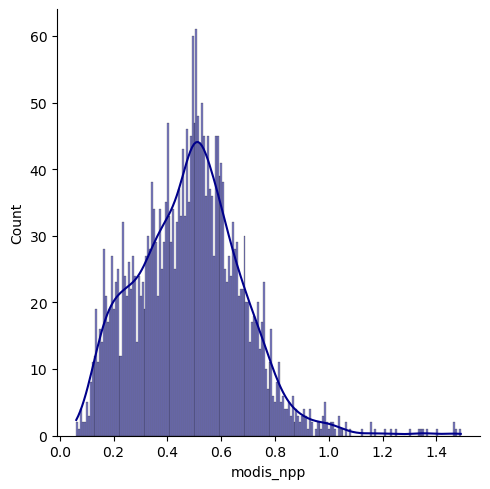

In [73]:
import seaborn as sns

sns.displot(
    cnty_ann_SW_NPP_Ra.modis_npp, kde=True, kind="hist", bins=200, color="darkblue"
)

/Users/hn/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


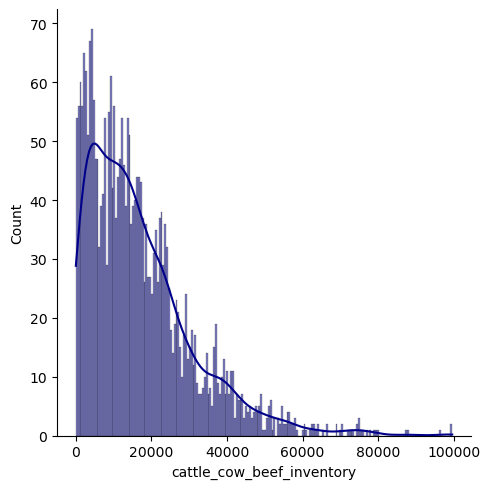

In [74]:
import seaborn as sns

sns.displot(
    cnty_ann_SW_NPP_Ra.cattle_cow_beef_inventory,
    kde=True,
    kind="hist",
    bins=200,
    color="darkblue",
)

/Users/hn/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


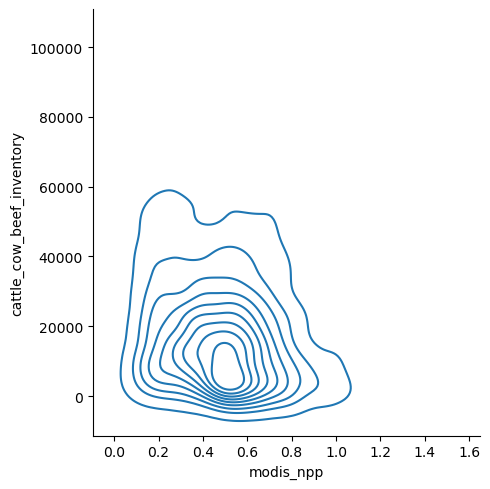

In [75]:
sns.displot(
    data=cnty_ann_SW_NPP_Ra,
    x="modis_npp",
    y="cattle_cow_beef_inventory",
    kind="kde",
    height=5,
)

In [76]:
# plt.pcolormesh(, ,)

In [77]:
# hist, xedges, yedges = np.histogram2d(cnty_ann_SW_NPP_Ra.modis_npp,
#                                       cnty_ann_SW_NPP_Ra.cattle_cow_inventory,
#                                       bins=200)

# # Construct arrays for the anchor positions of the 16 bars.
# xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
# xpos = xpos.ravel()
# ypos = ypos.ravel()
# zpos = 0

# # Construct arrays with the dimensions for the 16 bars.
# dx = dy = 0.5 * np.ones_like(zpos)
# dz = hist.ravel()

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
# plt.show()

In [78]:
# data_array = np.array(cnty_ann_SW_NPP_Ra[["modis_npp", "cattle_cow_inventory"]])
# data_array

In [79]:
# data_array = np.array(cnty_ann_SW_NPP_Ra[["modis_npp", "cattle_cow_inventory"]])
# data_array.shape

# #
# # Create an X-Y mesh of the same dimension as the 2D data. You can
# # think of this as the floor of the plot.
# #
# x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
#                               np.arange(data_array.shape[0]) )


# x_data, y_data, z_data = x_data.flatten(), y_data.flatten(), data_array.flatten()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.bar3d(x_data, y_data,
#          np.zeros(len(z_data)),
#          1, 1, z_data )
# plt.show()

In [80]:
tick_legend_FontSize = 10

params = {
    "legend.fontsize": tick_legend_FontSize,  # medium, large
    # 'figure.figsize': (6, 4),
    "axes.labelsize": tick_legend_FontSize * 1.5,
    "axes.titlesize": tick_legend_FontSize * 1.3,
    "xtick.labelsize": tick_legend_FontSize * 1.1,  #  * 0.75
    "ytick.labelsize": tick_legend_FontSize * 1.1,  #  * 0.75
    "axes.titlepad": 10,
}

plt.rc("font", family="Palatino")
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["ytick.labelleft"] = True
plt.rcParams.update(params)

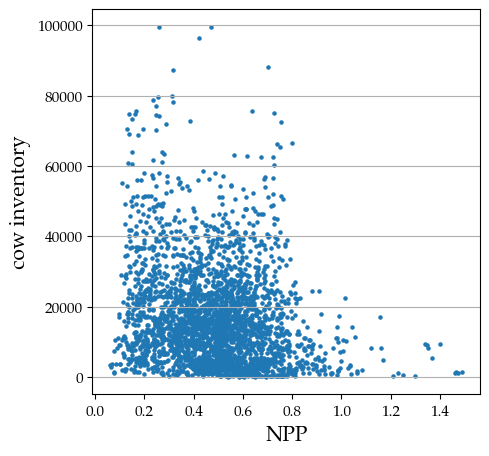

In [81]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
axes.grid(axis="y", which="both")
axes.scatter(
    cnty_ann_SW_NPP_Ra.modis_npp, cnty_ann_SW_NPP_Ra.cattle_cow_beef_inventory, s=5
)
axes.set_xlabel("NPP")
axes.set_ylabel("cow inventory")
plt.show()

In [82]:
cnty_ann_SW_NPP_Ra[cnty_ann_SW_NPP_Ra.cattle_cow_beef_inventory > 90000]

,year,county_fips,modis_npp,rangeland_acre,county_area_acre,rangeland_fraction,cattle_cow_beef_inventory,S1_countyMean_total_precip,S2_countyMean_total_precip,S3_countyMean_total_precip,S4_countyMean_total_precip,S1_countyMean_avg_Tavg,S2_countyMean_avg_Tavg,S3_countyMean_avg_Tavg,S4_countyMean_avg_Tavg
416,2002,31089,0.259076,1098674.42,1544536.32,0.71,99490.0,33.208,163.734,151.861,92.950,-1.606911,18.219664,20.184721,2.298228
1111,2007,31089,0.470371,1098674.42,1544536.32,0.71,99550.0,120.544,377.730,173.316,165.076,-2.329789,17.501016,20.265311,2.670750
2501,2017,31089,0.421685,1098674.42,1544536.32,0.71,96467.0,96.003,356.662,274.268,136.267,-0.340378,17.243344,18.767000,2.787989


In [83]:
county_id_name_fips[county_id_name_fips.county_fips == "06107"]

,county_fips,county_name,FIPS,STATE
195,06107,Tulare County,6107,CA


In [84]:
large_cows_fips = list(
    cnty_ann_SW_NPP_Ra[
        cnty_ann_SW_NPP_Ra.cattle_cow_beef_inventory > 200000
    ].county_fips
)
county_id_name_fips[county_id_name_fips.county_fips.isin(large_cows_fips)]

,county_fips,county_name,FIPS,STATE


In [85]:
sorted(cnty_ann_SW_NPP_Ra.modis_npp)[-10:]

[1.2998233341947487,
 1.3393699621307962,
 1.347741960604502,
 1.3508312293917517,
 1.368399977684021,
 1.4016276532292922,
 1.4624181145238564,
 1.465055531683674,
 1.4743251856214257,
 1.490733130140138]

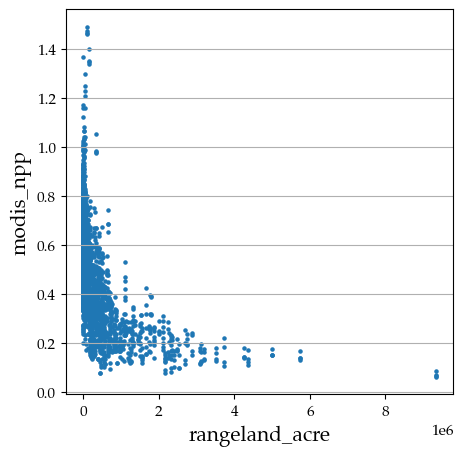

In [86]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
axes.grid(axis="y", which="both")
axes.scatter(cnty_ann_SW_NPP_Ra.rangeland_acre, cnty_ann_SW_NPP_Ra.modis_npp, s=5)
axes.set_xlabel("rangeland_acre")
axes.set_ylabel("modis_npp")
plt.show()

In [87]:
NPP = pd.read_csv(Min_data_base + "county_annual_MODIS_NPP.csv")
RA = pd.read_csv(reOrganized_dir + "county_rangeland_and_totalarea_fraction.csv")

RA.rename(columns={"fips_id": "county_fips"}, inplace=True)
NPP.rename(columns={"county": "county_fips"}, inplace=True)

NPP_RA = pd.merge(NPP, RA, on=["county_fips"], how="left")
NPP_RA.head(2)

,year,county_fips,NPP,rangeland_acre,county_area_acre,rangeland_fraction
0,2001,101003,0.926441,13037.43,1060302.72,0.010000
1,2001,101005,0.629133,18.23,575781.12,0.000032


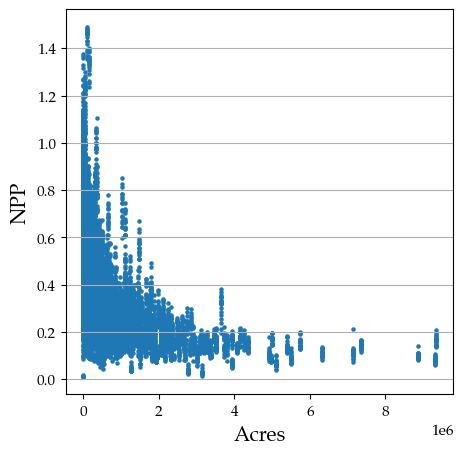

In [88]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
axes.grid(axis="y", which="both")
axes.scatter(NPP_RA.rangeland_acre, NPP_RA.NPP, s=5)
axes.set_xlabel("Acres")
axes.set_ylabel("NPP")
plt.show()

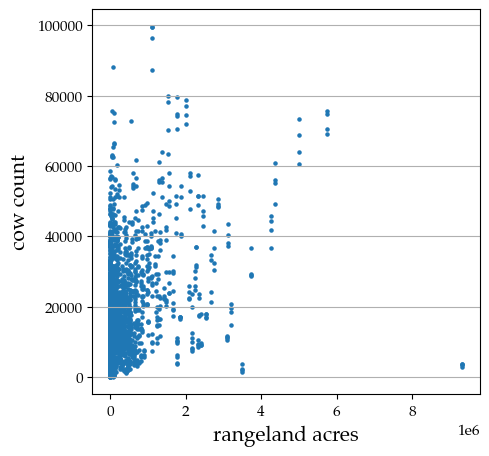

In [89]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
axes.grid(axis="y", which="both")
axes.scatter(
    cnty_ann_SW_NPP_Ra.rangeland_acre, cnty_ann_SW_NPP_Ra.cattle_cow_beef_inventory, s=5
)

axes.set_xlabel("rangeland acres")
axes.set_ylabel("cow count")

plt.show()

# Residual Plots

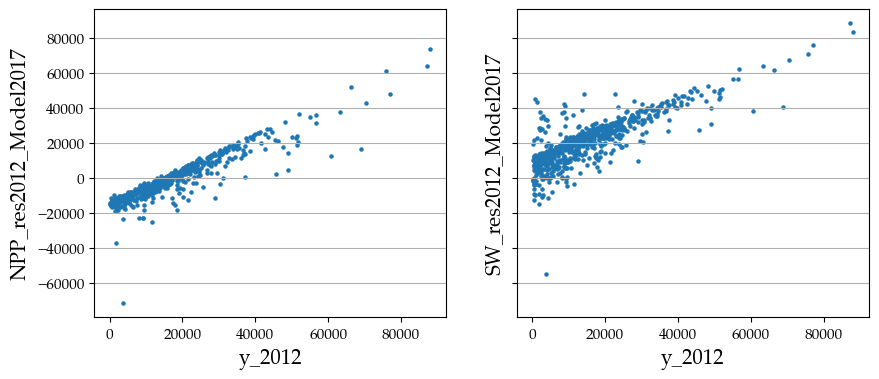

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
(ax1, ax2) = axes
ax1.grid(axis="y", which="both")
ax2.grid(axis="y", which="both")
##################################################
ax1.scatter(y_2012, NPP_res2012_Model2017, s=5)
ax1.set_xlabel("y_2012")
ax1.set_ylabel("NPP_res2012_Model2017")
##################################################
ax2.scatter(y_2012, SW_res2012_Model2017, s=5)
ax2.set_xlabel("y_2012")
ax2.set_ylabel("SW_res2012_Model2017")
plt.show()

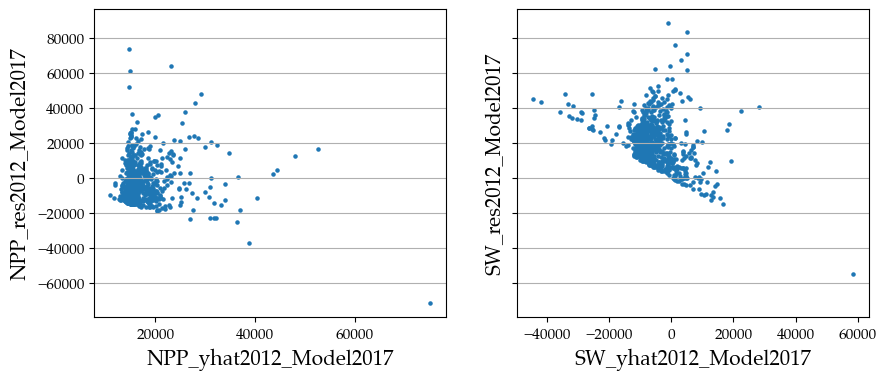

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
(ax1, ax2) = axes
ax1.grid(axis="y", which="both")
ax2.grid(axis="y", which="both")
##################################################
ax1.scatter(NPP_yhat2012_Model2017, NPP_res2012_Model2017, s=5)
ax1.set_xlabel("NPP_yhat2012_Model2017")
ax1.set_ylabel("NPP_res2012_Model2017")
##################################################
ax2.scatter(SW_yhat2012_Model2017, SW_res2012_Model2017, s=5)
ax2.set_xlabel("SW_yhat2012_Model2017")
ax2.set_ylabel("SW_res2012_Model2017")
plt.show()

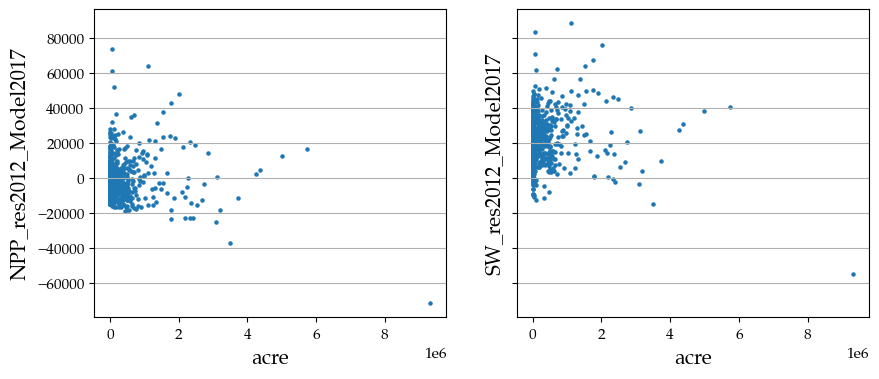

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
(ax1, ax2) = axes
ax1.grid(axis="y", which="both")
ax2.grid(axis="y", which="both")
##################################################
ax1.scatter(SW_Ra_cattleInv_2012.rangeland_acre, NPP_res2012_Model2017, s=5)
ax1.set_xlabel("acre")
ax1.set_ylabel("NPP_res2012_Model2017")
##################################################
ax2.scatter(NPP_Ra_cattleInv_2012.rangeland_acre, SW_res2012_Model2017, s=5)
ax2.set_xlabel("acre")
ax2.set_ylabel("SW_res2012_Model2017")

plt.show()

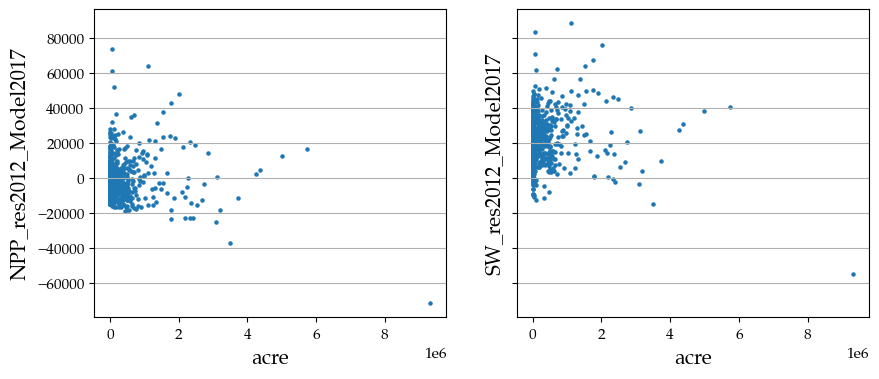

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
(ax1, ax2) = axes
ax1.grid(axis="y", which="both")
ax2.grid(axis="y", which="both")
##################################################
ax1.scatter(SW_Ra_cattleInv_2012.rangeland_acre, NPP_res2012_Model2017, s=5)
ax1.set_xlabel("acre")
ax1.set_ylabel("NPP_res2012_Model2017")
##################################################
ax2.scatter(NPP_Ra_cattleInv_2012.rangeland_acre, SW_res2012_Model2017, s=5)
ax2.set_xlabel("acre")
ax2.set_ylabel("SW_res2012_Model2017")
plt.show()